In [172]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [173]:
df_dataset = pd.read_csv('model_78.csv')
list_of_cols = df_dataset.columns.tolist()
list_of_cols = list_of_cols[1:]
df_dataset = df_dataset[list_of_cols]
df_dataset

,No,CF_1,CF_2,RF_1,RF_2,CW_1,CW_2,label
0,1,0.00,0.00,0.00,0.00,0.00,100.00,8
1,2,0.00,100.00,0.00,100.00,100.00,100.00,7
2,3,50.00,50.00,50.00,50.00,50.00,100.00,8
3,4,33.33,66.67,33.33,66.67,66.67,66.67,7
4,5,66.67,66.67,66.67,66.67,66.67,66.67,7
5,6,60.00,60.00,60.00,60.00,60.00,70.00,8
6,7,70.00,60.00,60.00,60.00,69.23,61.54,7
7,8,70.00,60.00,60.00,40.00,71.43,57.14,7
8,9,70.00,50.00,80.00,40.00,66.67,60.00,8
9,10,50.00,50.00,40.00,40.00,55.56,55.56,7


In [174]:
indices = df_dataset.index[df_dataset.label == -1].tolist()
df_dataset.drop(indices, inplace=True)

In [175]:
df_dataset.shape
len(df_dataset)

137

In [176]:
df_dataset[:len(df_dataset)-1]
k = df_dataset[len(df_dataset)-1:]
type(k.label.tolist()[0])
#k.values.tolist()[0]

int

In [177]:
model = df_dataset#[:117]
input_sample = df_dataset[117:]
model.head()
model.shape

(137, 8)

In [178]:
#k = input_sample.loc[117][:-1]
#k
input_sample

,No,CF_1,CF_2,RF_1,RF_2,CW_1,CW_2,label
119,120,0.0,50.0,0.0,40.0,44.03,63.65,8
120,121,0.0,60.0,0.0,40.0,43.97,63.69,8
121,122,0.0,60.0,0.0,60.0,43.91,63.74,8
122,123,0.0,60.0,0.0,60.0,43.86,63.66,7
123,124,0.0,60.0,0.0,60.0,43.80,63.70,8
124,125,0.0,80.0,0.0,80.0,43.05,63.84,8
125,126,0.0,90.0,0.0,100.0,42.94,63.93,8
126,127,0.0,90.0,0.0,100.0,42.89,63.97,8
127,128,0.0,90.0,0.0,100.0,42.84,64.01,8
128,129,0.0,90.0,0.0,100.0,42.37,64.29,8


In [179]:
list_of_cols = model.columns.tolist()
list_of_cols = list_of_cols[: -1]
#list_of_cols = list_of_cols[:2] + list_of_cols[4:]
X = model[list_of_cols]
y = model['label']
type(X)

pandas.core.frame.DataFrame

In [180]:
y.unique()

array([8, 7], dtype=int64)

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)
#logistic regression classifier
#clf = LogisticRegression(C=1).fit(X[0:87], y_train[0:87])
clf = LogisticRegression(C=1).fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.637254901961
0.571428571429


In [182]:
clf.coef_

array([[ 0.00169125,  0.00817723, -0.01260565,  0.0099832 ,  0.02681   ,
        -0.06888563,  0.03455538]])

In [183]:
winner = clf.predict([118,60,40,53.5,63.72,30,10])
winner[0]

C:\Users\Hitesh Mohite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


8

In [184]:
input_sample

,No,CF_1,CF_2,RF_1,RF_2,CW_1,CW_2,label
119,120,0.0,50.0,0.0,40.0,44.03,63.65,8
120,121,0.0,60.0,0.0,40.0,43.97,63.69,8
121,122,0.0,60.0,0.0,60.0,43.91,63.74,8
122,123,0.0,60.0,0.0,60.0,43.86,63.66,7
123,124,0.0,60.0,0.0,60.0,43.80,63.70,8
124,125,0.0,80.0,0.0,80.0,43.05,63.84,8
125,126,0.0,90.0,0.0,100.0,42.94,63.93,8
126,127,0.0,90.0,0.0,100.0,42.89,63.97,8
127,128,0.0,90.0,0.0,100.0,42.84,64.01,8
128,129,0.0,90.0,0.0,100.0,42.37,64.29,8


In [185]:
X_train
y.value_counts()

8    81
7    56
Name: label, dtype: int64

In [186]:
X[88:]

,No,CF_1,CF_2,RF_1,RF_2,CW_1,CW_2
90,91,50.0,50.0,60.0,100.0,49.76,63.15
91,92,40.0,50.0,20.0,80.0,51.02,63.41
92,93,40.0,60.0,20.0,80.0,50.95,63.46
93,94,30.0,70.0,0.0,80.0,50.87,63.52
94,95,30.0,80.0,0.0,80.0,50.80,63.57
95,96,20.0,80.0,0.0,100.0,50.72,63.62
96,97,10.0,90.0,0.0,100.0,50.65,63.68
97,98,10.0,90.0,0.0,100.0,50.58,63.58
98,99,0.0,90.0,0.0,80.0,50.36,63.74
99,100,0.0,80.0,0.0,80.0,48.75,64.21


<IPython.core.display.Javascript object>


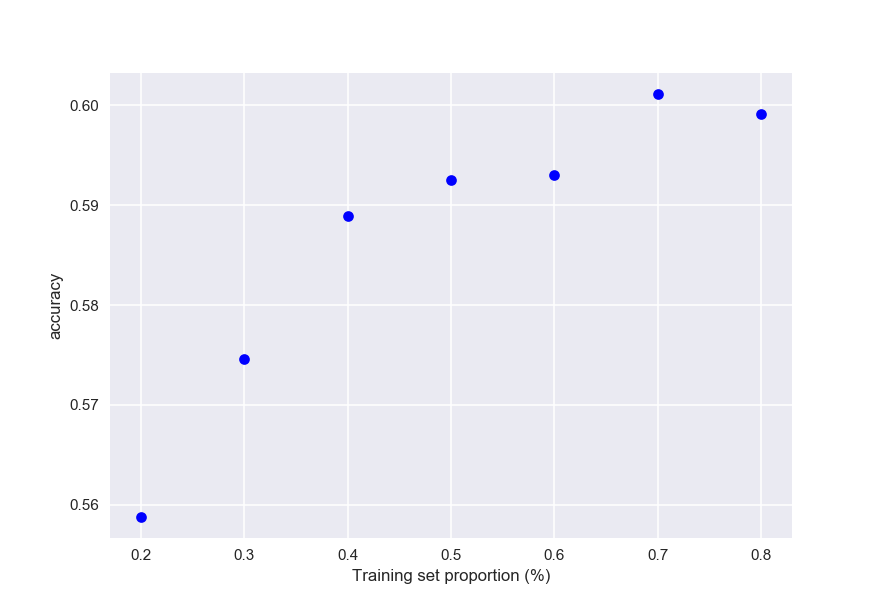

In [127]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

clf = LogisticRegression(C=1)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)
#logistic regression classifier
#clf = LogisticRegression(C=1).fit(X[0:87], y_train[0:87])
clf = LogisticRegression(C=1).fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.637254901961
0.571428571429


In [188]:
y_pred = clf.predict(X_test)

In [189]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 9,  7],
       [ 8, 11]])

In [190]:
import seaborn as sns

In [191]:
cm = confusion_matrix(y_test, y_pred)

In [192]:
cm

array([[ 9,  7],
       [ 8, 11]])

<IPython.core.display.Javascript object>


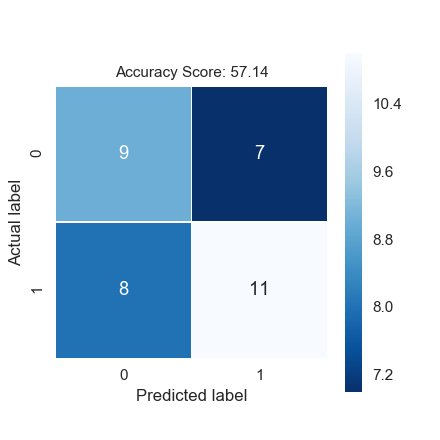

In [193]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
score = clf.score(X_test, y_test)
score = round(score*100,2)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10)

In [194]:
clf.coef_

array([[ 0.00169125,  0.00817723, -0.01260565,  0.0099832 ,  0.02681   ,
        -0.06888563,  0.03455538]])

In [211]:
y_pred

array([7, 7, 8, 8, 7, 7, 7, 8, 8, 7, 7, 7, 8, 7, 8, 8, 7, 8, 8, 7, 8, 7, 7,
       8, 7, 8, 8, 8, 8, 7, 8, 8, 7, 7, 8], dtype=int64)

In [210]:
f_p_r, t_p_r, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(f_p_r, t_p_r)

ValueError: Data is not binary and pos_label is not specified